## EDA of Supermarket

1.General exploration of Data like seeing shape, info, null values etc of given data.

2.Product Popularity categorised by Gender and Cities.

3.Sales Distribution categorised by Gender and Cities.

4.Patment methods and how it varies with Cities and Gender.

5.Distribution of Rating feature and compared to various parameter like Gender, City and Product line and find room for improvement  


6.How Total Sales varies with Product line, Gender and Cities.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
su=pd.read_csv(r'C:\Users\HP\Desktop\Python\data\supermarket_sales - Sheet1.csv')

In [3]:
su.head()
# cogs means 'Cost Of Goods Sold'.
# COGS does not include indirect expenses, like certain overhead costs. Do not factor things like utilities, marketing expenses,
# or shipping fees into the cost of goods sold.

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
su.drop(['Invoice ID'],axis=1, inplace=True)

In [5]:
su.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# General exploration of Data like seeing shape, info, null values etc of given data 

In [6]:
su.shape

(1000, 16)

In [7]:
su.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


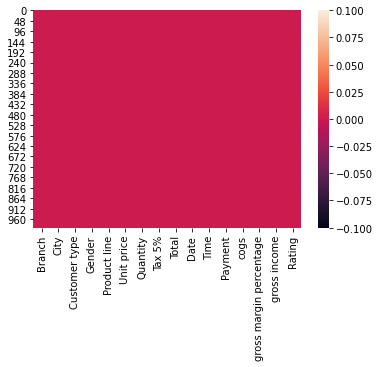

In [8]:
sns.heatmap(su.isnull())

In [9]:
su.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             

# Pair Plot

Pair plot is used to see co-relation between features and it shows the distribution. other then pair plot we can use correlation graph.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


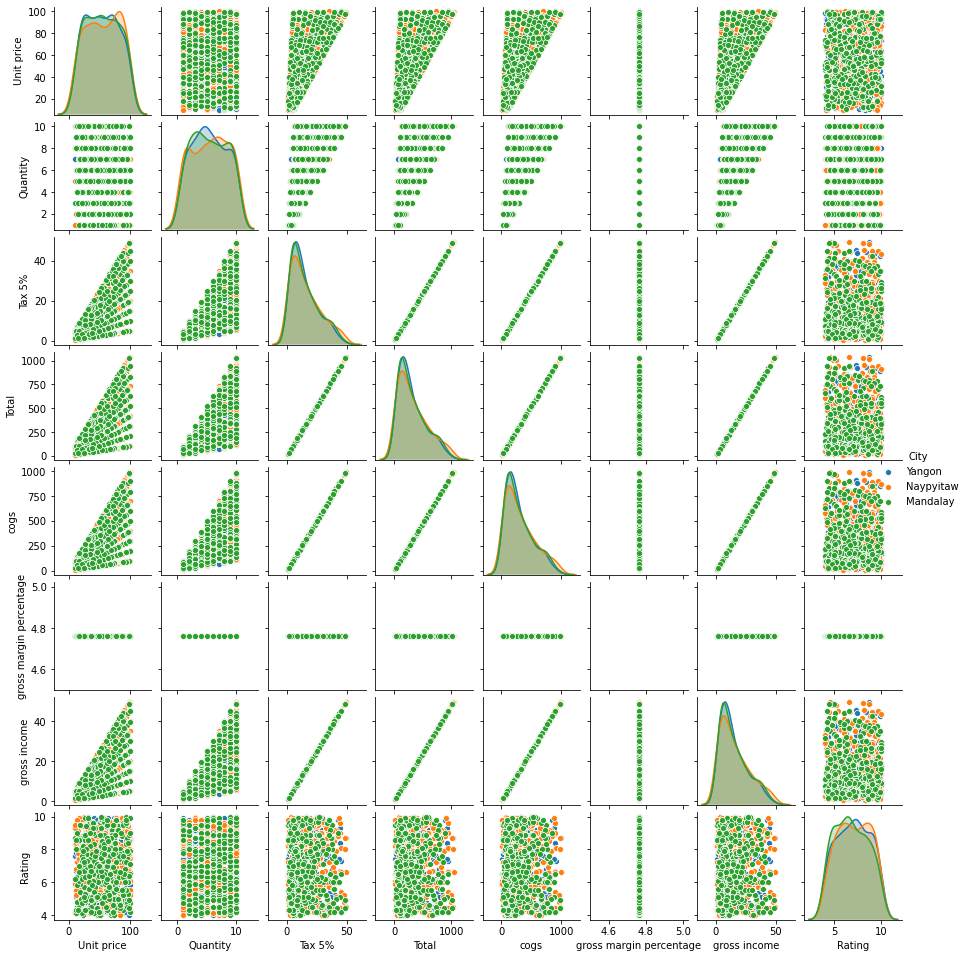

In [10]:
sns.pairplot(su, hue='City')
fig=plt.gcf()
fig.set_size_inches(13,13)

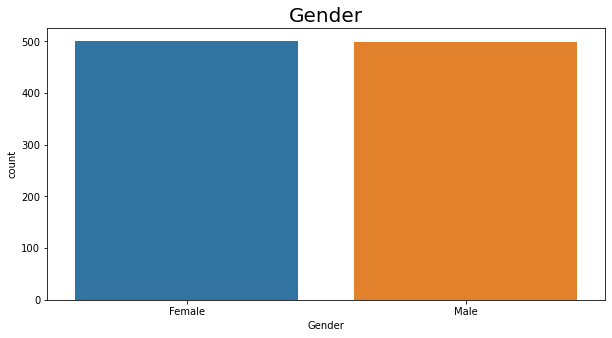

In [11]:
sns.countplot(x='Gender', data=su)
plt.title('Gender',fontsize=20)
fig=plt.gcf()
fig.set_size_inches(10,5)

In [12]:
su["Gender"].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

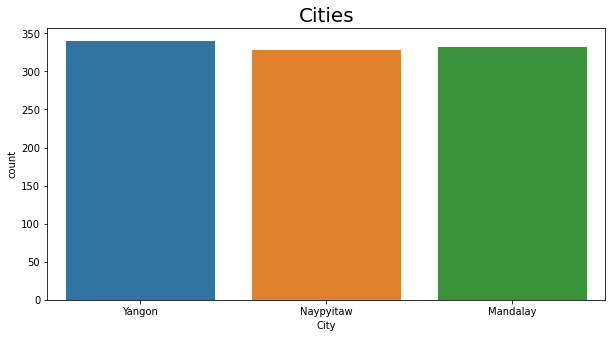

In [13]:
sns.countplot(x='City', data=su)
plt.title('Cities',fontsize=20)
fig=plt.gcf()
fig.set_size_inches(10,5)

In [14]:
su["City"].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

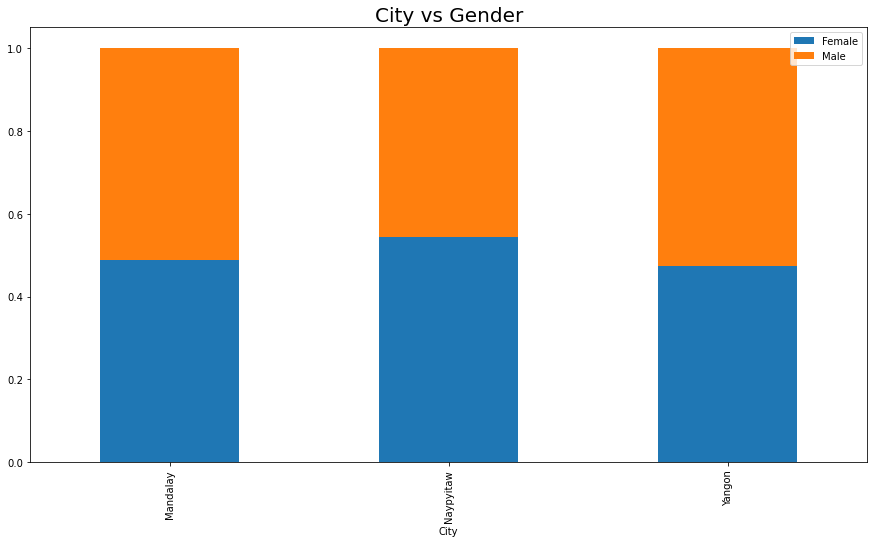

In [15]:
plt.rcParams['figure.figsize'] = (15, 8)
Y = pd.crosstab(su['City'], su['Gender'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('City vs Gender', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

Text(0.5, 1.0, 'Customer type')

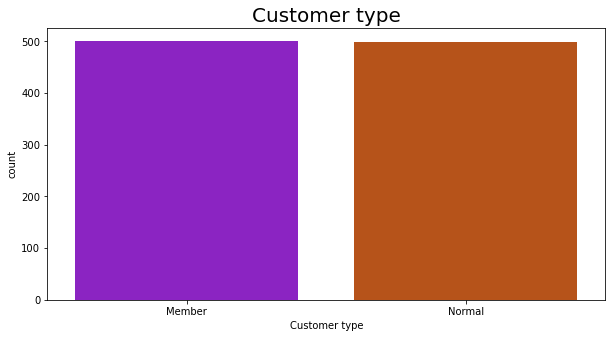

In [16]:
sns.countplot(x='Customer type', data=su, palette='gnuplot')
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.title('Customer type',fontsize=20)

In [17]:
su["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

Text(0.5, 1.0, 'City vs Gender')

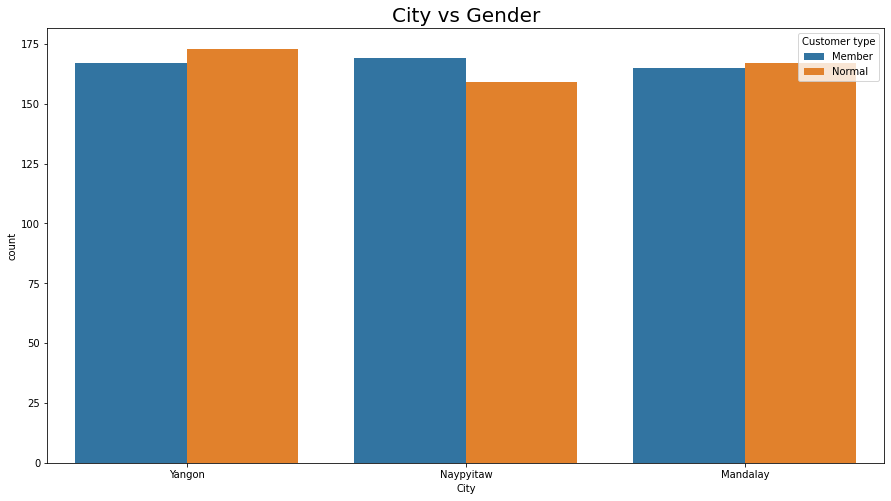

In [18]:
sns.countplot(x='City', hue='Customer type', data=su)
plt.title('City vs Gender',fontsize=20)

Text(0.5, 1.0, 'Gender vs Customer')

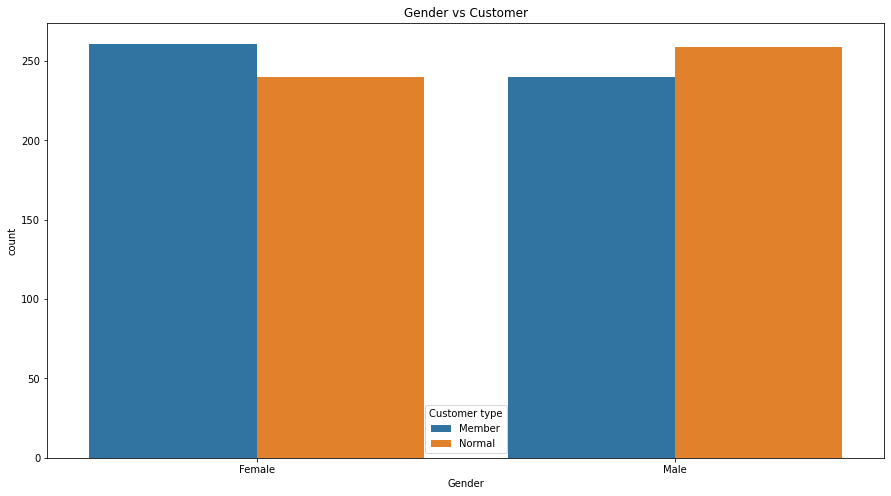

In [19]:
sns.countplot(x='Gender', hue='Customer type', data=su)
plt.title('Gender vs Customer')

Text(0.5, 1.0, 'Cities vs Customer type vs Male')

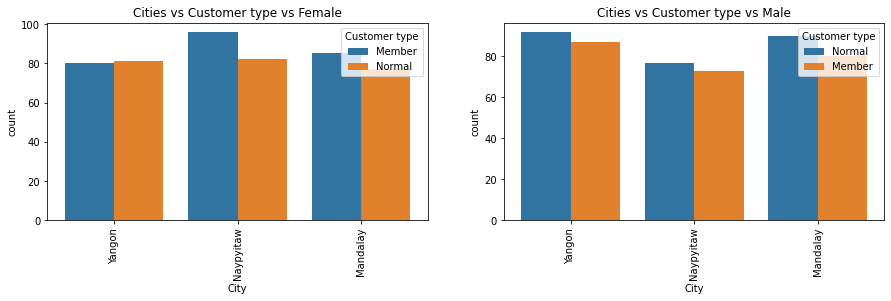

In [20]:

plt.subplot(2,2,1)
# plt.figure(figsize=(15,10))
dat = su[su['Gender']=='Female']
chart = sns.countplot(x = 'City', data=dat, hue='Customer type')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')
chart.plot()
plt.title('Cities vs Customer type vs Female')

plt.subplot(2,2,2)
# plt.figure(figsize=(15,10))
dat = su[su['Gender']=='Male']
chart = sns.countplot(x = 'City', data=dat, hue='Customer type')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')
chart.plot()
plt.title('Cities vs Customer type vs Male')

Text(0.5, 1.0, 'Product line')

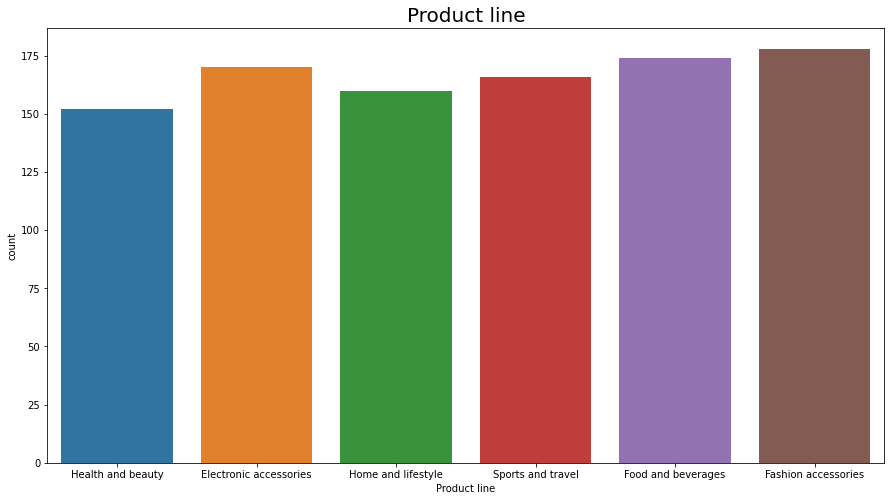

In [21]:
sns.countplot(x='Product line', data=su)
plt.title('Product line',fontsize=20)
# fig=plt.gcf()
# fig.set_size_inches(15,10)

In [22]:
su["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

# Product Popularity categorised by Gender and Cities

Text(0.5, 1.0, 'Product Popularity categorised by Gender')

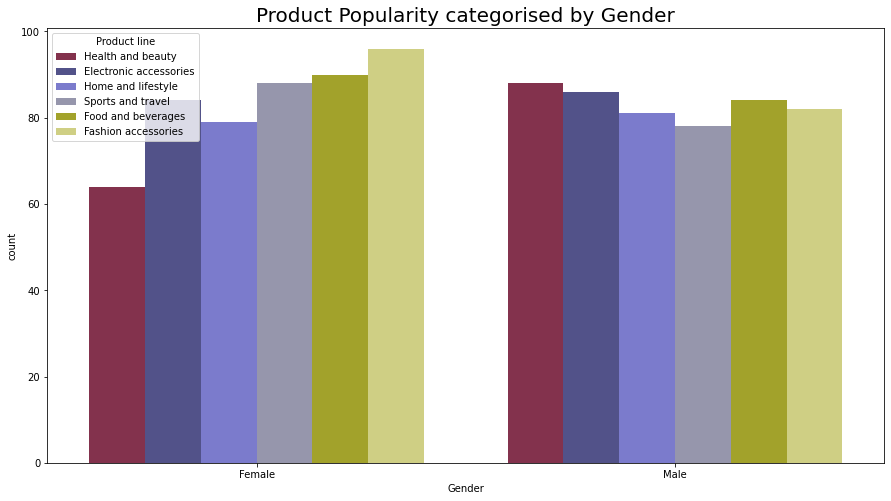

In [23]:
sns.countplot(x='Gender', data=su, hue='Product line', palette='gist_stern')
plt.title('Product Popularity categorised by Gender',fontsize=20)

Text(0.5, 1.0, 'Product Popularity categorised by City')

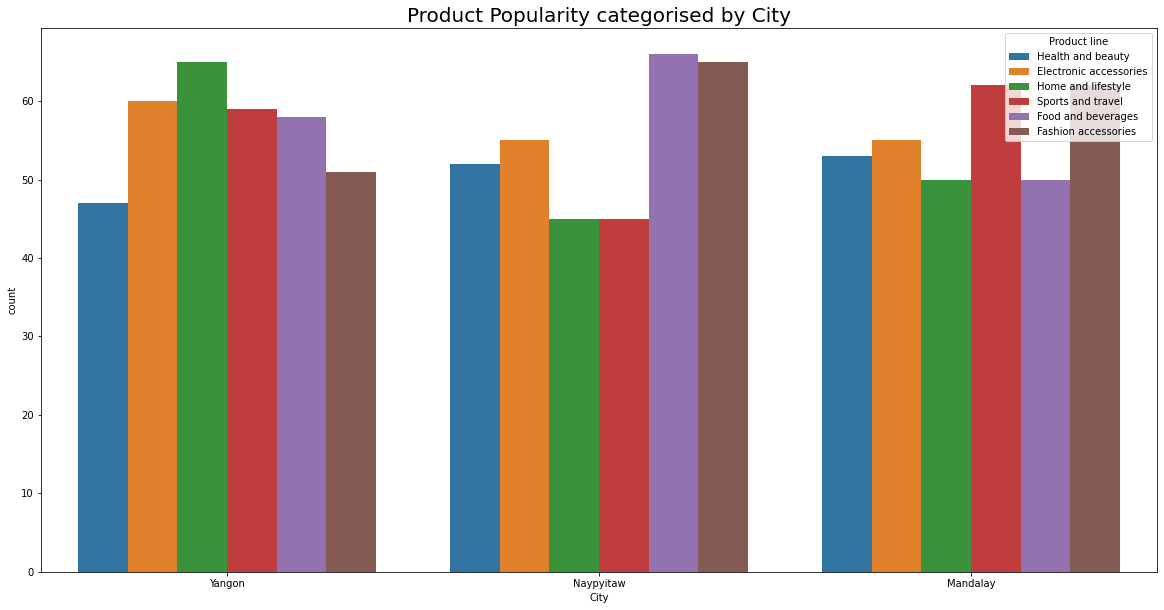

In [24]:
sns.countplot(x='City', data=su, hue='Product line')
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.title('Product Popularity categorised by City',fontsize=20)

Text(0.5, 1.0, 'Product Popularity categorised by City and only Male')

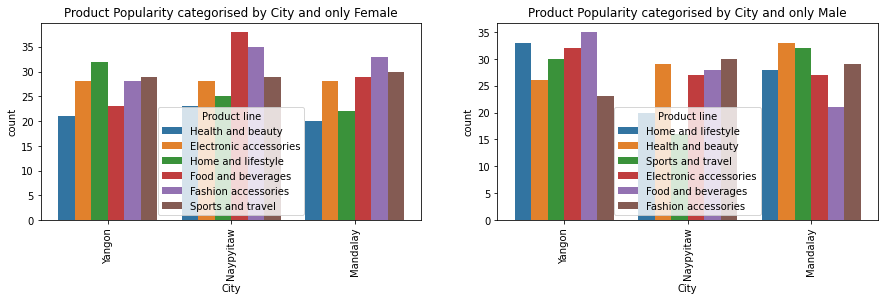

In [25]:
plt.subplot(2,2,1)
# plt.figure(figsize=(8,8))
dat = su[su['Gender']=='Female']
chart = sns.countplot(x = 'City', data=dat, hue='Product line')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')
chart.plot()
plt.title('Product Popularity categorised by City and only Female')

plt.subplot(2,2,2)
# plt.figure(figsize=(5,5))
dat = su[su['Gender']=='Male']
chart = sns.countplot(x = 'City', data=dat, hue='Product line')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')
chart.plot()
plt.title('Product Popularity categorised by City and only Male')

# Sales Distribution categorised by Gender and Cities

Text(0.5, 1.0, 'Total')

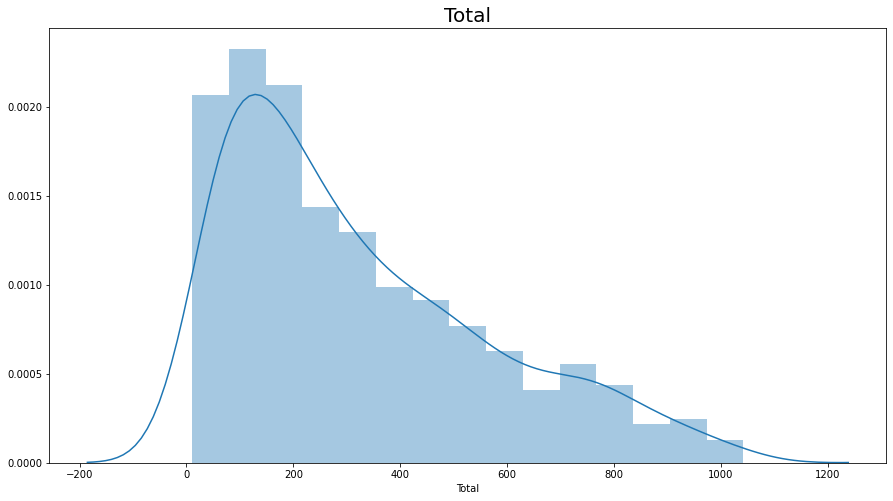

In [26]:
sns.distplot(su['Total'])
plt.title('Total',fontsize=20)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


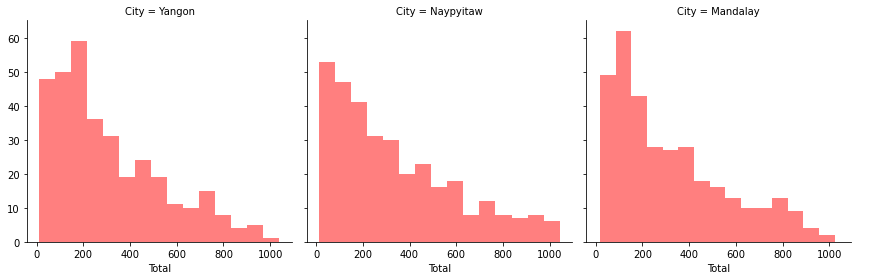

In [27]:
g = sns.FacetGrid(su, col='City', size=4)
g.map(plt.hist, 'Total', alpha=0.5, bins=15,color='r', )
g.add_legend()
plt.show()

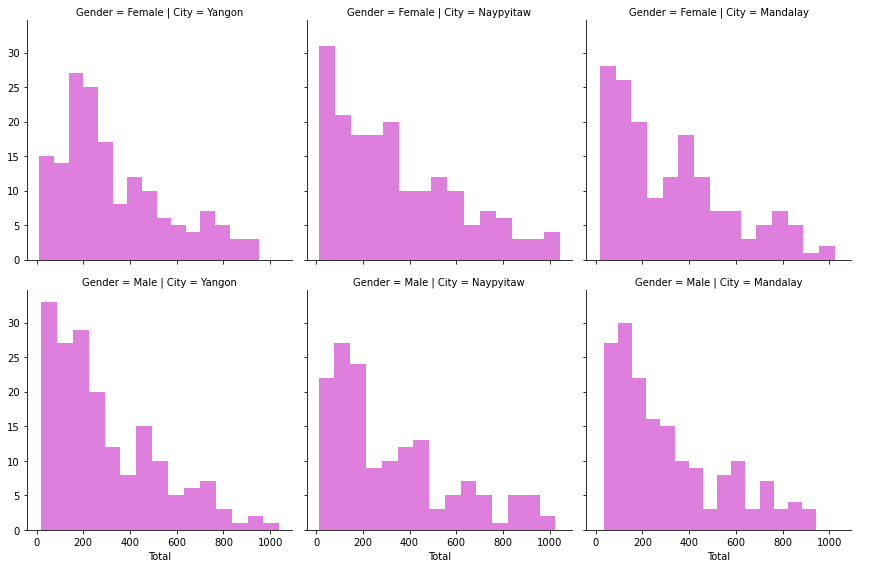

In [28]:
g = sns.FacetGrid(su, row='Gender', col='City', size=4)
# plt.title('distribution of Total categorised City and Gender ')
g.map(plt.hist, 'Total', alpha=0.5, bins=15,color='m')
g.add_legend()
plt.show()


In [29]:
su.groupby('City').sum()['Total']

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

In [30]:
print('city, Yangon')
dat = su[su['City']=='Yangon']
dat.groupby('Gender').sum()['Total']

city, Yangon


Gender
Female    53269.1670
Male      52931.2035
Name: Total, dtype: float64

In [31]:
print('city, Naypyitaw')
dat = su[su['City']=='Naypyitaw']
dat.groupby('Gender').sum()['Total']


city, Naypyitaw


Gender
Female    61685.4630
Male      48883.2435
Name: Total, dtype: float64

In [32]:
print('city, Mandalay')
dat = su[su['City']=='Mandalay']
dat.groupby('Gender').sum()['Total']

city, Mandalay


Gender
Female    52928.295
Male      53269.377
Name: Total, dtype: float64

In [33]:
su.groupby('Gender').sum()['Total']

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

In [34]:
su.groupby('Product line').sum()['Total']

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

# Payment methods and how it varies with Cities and Gender

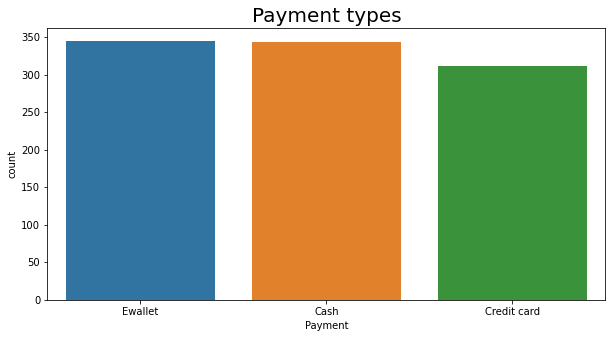

In [35]:
sns.countplot(x='Payment', data=su)
plt.title('Payment types',fontsize=20)
fig=plt.gcf()
fig.set_size_inches(10,5)

Text(0.5, 1.0, 'Payment vs Gender')

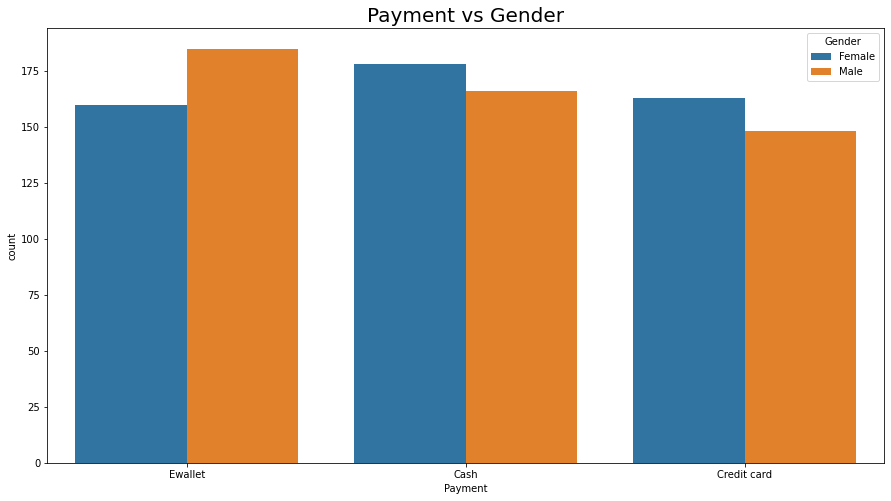

In [36]:
sns.countplot(x='Payment', data=su,hue='Gender')
plt.title('Payment vs Gender', fontsize=20)

Text(0.5, 1.0, 'Cities vs Payment')

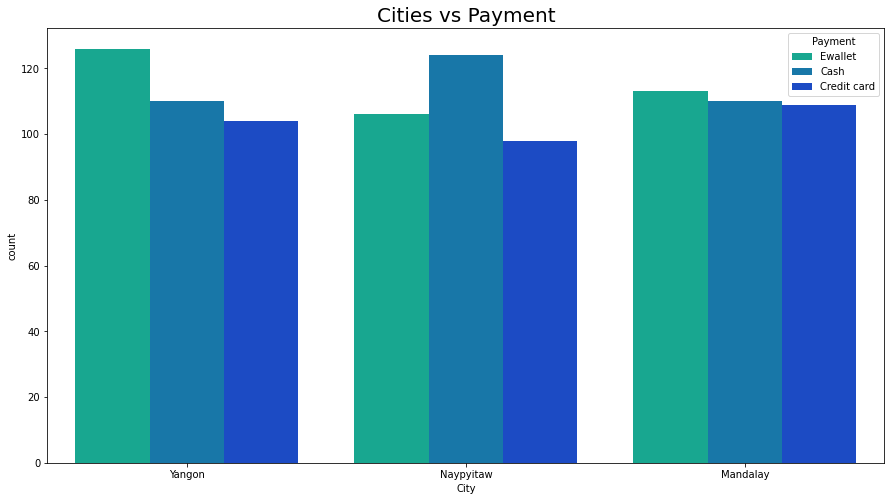

In [37]:
sns.countplot(x='City', data=su, hue='Payment', palette='winter_r')
plt.title('Cities vs Payment',fontsize=20)

In [38]:
su["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

# Distribution of Rating feature and compared to various parameter like Gender, City and Product line

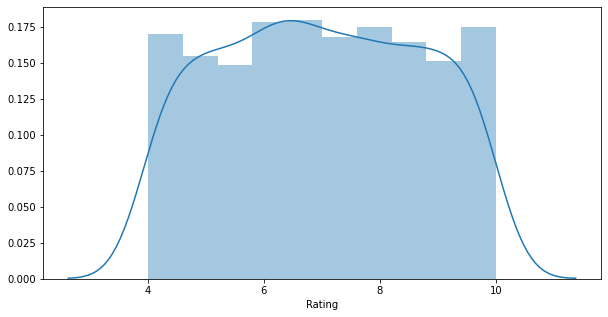

In [39]:
sns.distplot(su['Rating'])
fig=plt.gcf()
fig.set_size_inches(10,5)

Text(0.5, 1.0, 'Gender, Female')

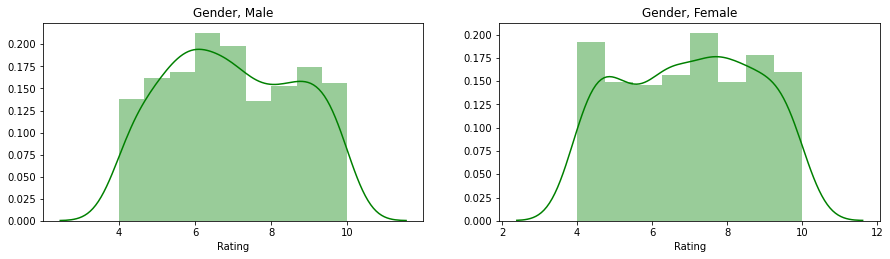

In [40]:
plt.subplot(2,2,1)
dat = su[su['Gender']=='Male']
chart=sns.distplot(dat['Rating'], color='g')
plt.title('Gender, Male')

plt.subplot(2,2,2)
dat = su[su['Gender']=='Female']
chart=sns.distplot(dat['Rating'], color='g')
plt.title('Gender, Female')


Text(0.5, 1.0, 'Mandalay')

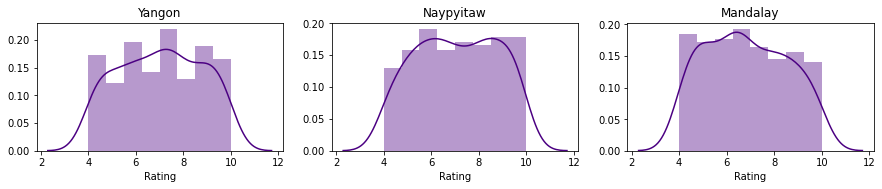

In [41]:
df1 = su[su['City']=='Yangon']
df2 = su[su['City']=='Naypyitaw']
df3 = su[su['City']=='Mandalay']

plt.subplot(3,3,1)
sns.distplot(df1['Rating'],color='indigo')
plt.title('Yangon')

plt.subplot(3,3,2)
sns.distplot(df2['Rating'],color='indigo')
plt.title('Naypyitaw')

plt.subplot(3,3,3)
sns.distplot(df3['Rating'],color='indigo')
plt.title('Mandalay')

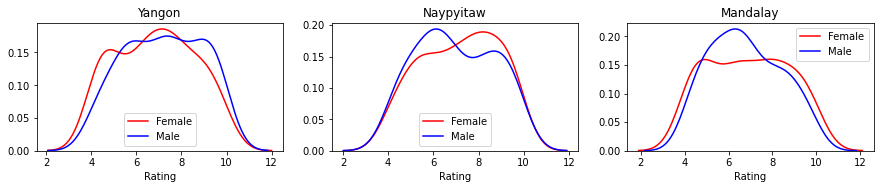

In [42]:
su1=df1[df1['Gender']=='Female']
su2=df2[df2['Gender']=='Female']
su3=df3[df3['Gender']=='Female']

su_male1=df1[df1['Gender']=='Male']
su_male2=df2[df2['Gender']=='Male']
su_male3=df3[df3['Gender']=='Male']

plt.subplot(3,3,1)
plt.title('Yangon')
sns.distplot(su1['Rating'],color='r',hist=False,label="Female")
sns.distplot(su_male1['Rating'],color='b',hist=False,label="Male")


plt.subplot(3,3,2)
plt.title('Naypyitaw')
sns.distplot(su2['Rating'],color='r',hist=False,label="Female")
sns.distplot(su_male2['Rating'],color='b',hist=False,label="Male")

plt.subplot(3,3,3)
plt.title('Mandalay')
sns.distplot(su3['Rating'],color='r',hist=False,label="Female")
sns.distplot(su_male3['Rating'],color='b',hist=False,label="Male")




In [43]:
su['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

Text(0.5, 1.0, 'Mandalay')

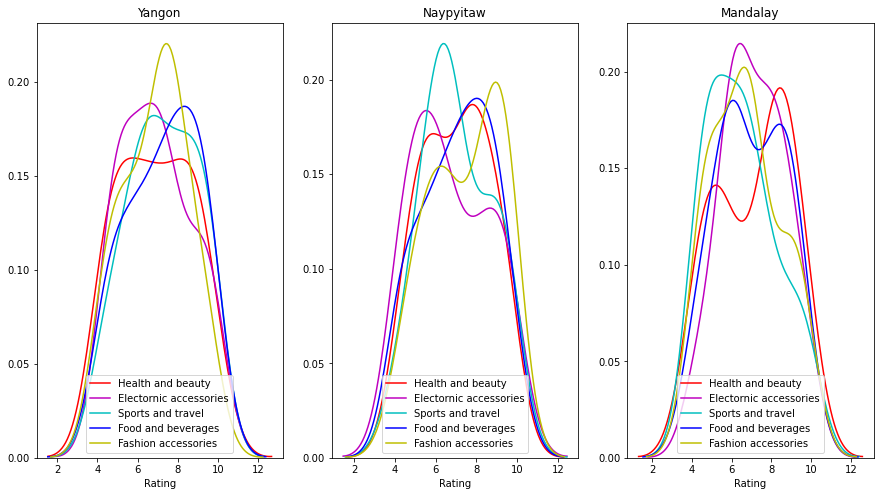

In [44]:
su_pro1=df1[df1['Product line']=='Health and beauty']
su_pro2=df1[df1['Product line']=='Electronic accessories']
su_pro3=df1[df1['Product line']=='Sports and travel']
su_pro4=df1[df1['Product line']=='Food and beverages']
su_pro5=df1[df1['Product line']=='Fashion accessories']

su_pro1n=df2[df2['Product line']=='Health and beauty']
su_pro2n=df2[df2['Product line']=='Electronic accessories']
su_pro3n=df2[df2['Product line']=='Sports and travel']
su_pro4n=df2[df2['Product line']=='Food and beverages']
su_pro5n=df2[df2['Product line']=='Fashion accessories']

su_pro1m=df3[df3['Product line']=='Health and beauty']
su_pro2m=df3[df3['Product line']=='Electronic accessories']
su_pro3m=df3[df3['Product line']=='Sports and travel']
su_pro4m=df3[df3['Product line']=='Food and beverages']
su_pro5m=df3[df3['Product line']=='Fashion accessories']

plt.subplot(1,3,1)
sns.distplot(su_pro1['Rating'],color='r',hist=False,label="Health and beauty")
sns.distplot(su_pro2['Rating'],color='m',hist=False,label="Electornic accessories")
sns.distplot(su_pro3['Rating'],color='c',hist=False,label="Sports and travel")
sns.distplot(su_pro4['Rating'],color='b',hist=False,label="Food and beverages")
sns.distplot(su_pro5['Rating'],color='y',hist=False,label="Fashion accessories")
plt.title('Yangon')

plt.subplot(1,3,2)
sns.distplot(su_pro1n['Rating'],color='r',hist=False,label="Health and beauty")
sns.distplot(su_pro2n['Rating'],color='m',hist=False,label="Electornic accessories")
sns.distplot(su_pro3n['Rating'],color='c',hist=False,label="Sports and travel")
sns.distplot(su_pro4n['Rating'],color='b',hist=False,label="Food and beverages")
sns.distplot(su_pro5n['Rating'],color='y',hist=False,label="Fashion accessories")
plt.title('Naypyitaw')

plt.subplot(1,3,3)
sns.distplot(su_pro1m['Rating'],color='r',hist=False,label="Health and beauty")
sns.distplot(su_pro2m['Rating'],color='m',hist=False,label="Electornic accessories")
sns.distplot(su_pro3m['Rating'],color='c',hist=False,label="Sports and travel")
sns.distplot(su_pro4m['Rating'],color='b',hist=False,label="Food and beverages")
sns.distplot(su_pro5m['Rating'],color='y',hist=False,label="Fashion accessories")
plt.title('Mandalay')


# How Total Sales varies with Product line, Gender and Cities

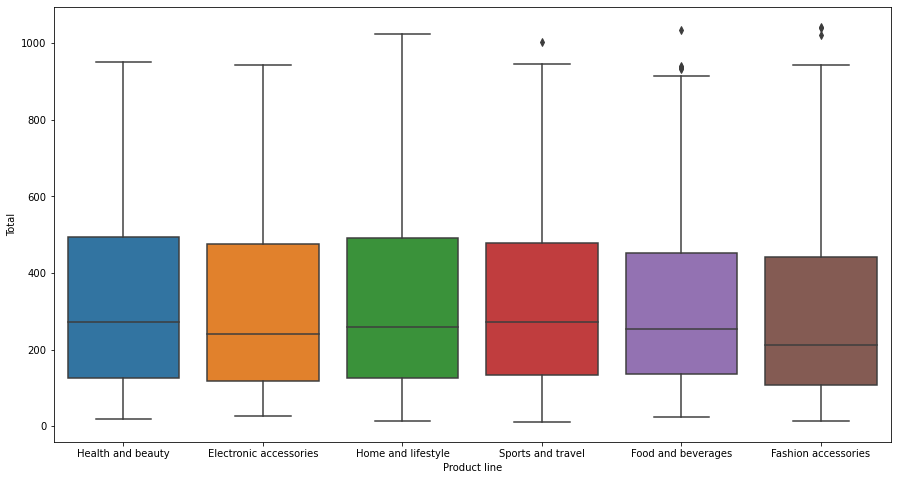

In [45]:
sns.boxplot(x='Product line', y='Total', data=su)

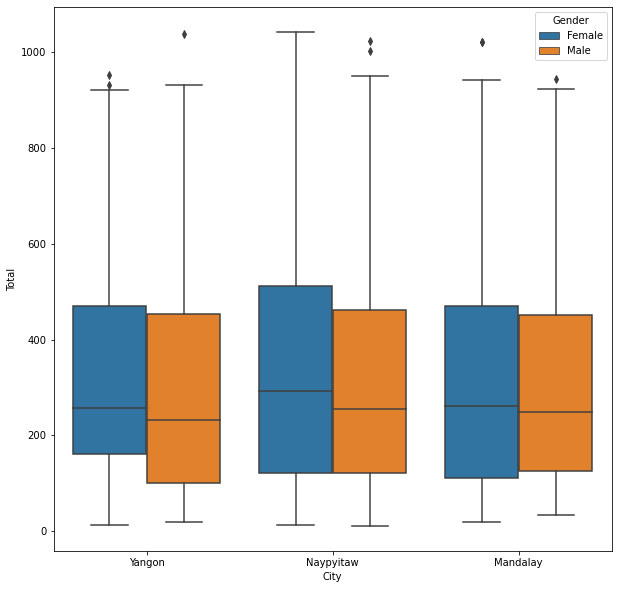

In [46]:
sns.boxplot(x='City', y='Total', data=su,hue='Gender')
fig=plt.gcf()
fig.set_size_inches(10,10)

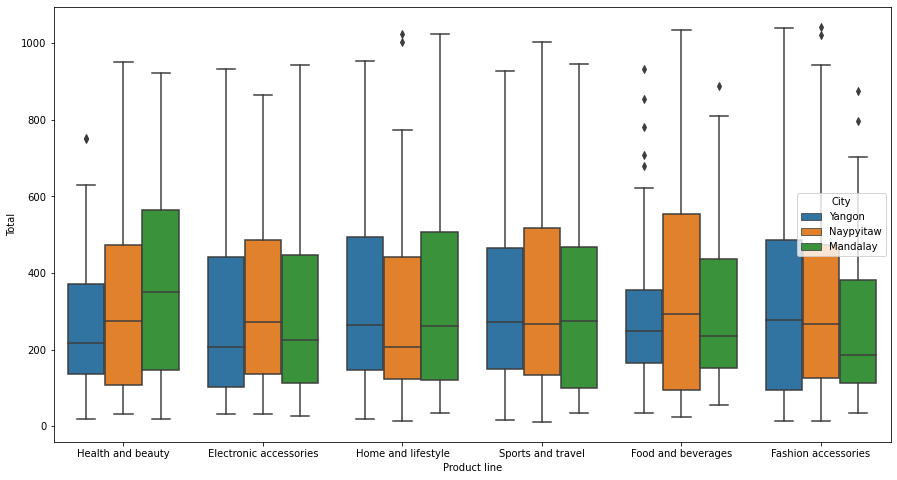

In [47]:
sns.boxplot(x='Product line', y='Total', data=su, hue='City')

# Conclusion


The given data set contains 3 cities Yangon, Naypyitaw and Mandalay.
The Gender distribution across 3 cities are Male count 499 and Female count 501. Female customer count are more in Naypyitaw city then other two cities.

Customer types are Normal and Member, there counts across 3 cities are similar but Female Members are more than Males.

Product categories (Product line) are,
•	Health and beauty
•	Electronics accessories
•	Home and lifestyle
•	Sports and travel
•	Food and beverages
•	Fashion accessories

Among all 6 categories Fashion accessories customer count are more across all 3 cities. Across 3 cities Female customer for Fashion accessories are more and Health and beauty are least and male customer are more for health and beauty.
Product Popularity categorized by Gender and Cities (by customer count NOT by sales)
1.	City – Yangon
•	Most sold category - Home and lifestyle
•	Most counts of product for female- Home and lifestyle
•	Most counts of product for male - Food and beverages
2.	City – Naypyitaw
•	Most sold category - Food and beverages
•	Most counts of product for female- Food and beverages 
•	Most counts of product for male - Fashion accessories 
3.	City – Mandalay.
•	Most sold category - Fashion accessories, Sports and travel
•	Most counts of product for female- Fashion accessories 
•	Most counts of product for male - Health and beauty

Sales Distribution categorized by Gender and Cities

Most of the sales happens in range of 10 dollars to 200 dollars . Among 3 cities distribution of sales in 1000 dollars are higher in Naypyitaw city.
Total sales as per cities are, Mandalay=106197.6720 dollars, Naypyitaw=110568.7065 dollars and Yangon=106200.3705 dollars.

Payment methods and how it varies with Cities and Gender

Here there are 3 types of payment methods they are, E-wallet, cash payment and credit card.

In city Yangon most people uses E-wallet, city Naypyitaw people prefer cash and in city Mandalay people uses all 3 mode of payment near equal.

Distribution of Rating feature and compared to various parameter like Gender, City and Product line.

Across all 3 cities customer give Rating in range of 6 point out of 10. By distribution graph we can see that more female customer given less rating than male.

Among 3 cities higher ratings are given to Naypyitaw city store than Mandalay or Yangon, this shows customers are happy with services provided by Naypyitaw city store. Even we can see rating distribution of product line in all 3 cities, by this we can improve. 
Example in Naypyitaw city store distribution of product line, ratings for Sports and travel and Electronic accessories are less, so here room for improvement is there. 

